In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.scorer import r2_score

In [2]:
%matplotlib notebook

## Linear regression with multi features

In [3]:
class Linear_Regression():
    '''
    linear regression using gradient descent
    '''
    def __init__(self, max_iter = 1e5, alpha = 0.01, eps = 1e-10, verbose= 0):
        '''
        :param verbose: set 1 to display more details of J val changes
        '''
        self.max_iter = max_iter
        self.alpha = alpha
        self.eps = eps
        self.verbose = verbose       
        
    def h(self, b, w, X): 
        '''
        :param b -  float or ndarry of shape [m,1], m - number of samples
        :param w - ndarray of shape [1,m],  n - number of features
        :param X - ndarray of shape [m,n], m - number of samples, n - number of features
        '''
        assert (X.shape[1]== w.shape[1])

        # YOUR_CODE. Insert the expression of h developed in Linear_Regression_1
        # START_CODE 
        h_res = b + X@w.T
        # END_CODE 
        
        if h_res.shape != (X.shape[0],1):
            print('h.shape = {} but expected {}'.format (h_res.shape,  (self.m,1)))
            raise Exception('Check assertion in h')    
        return h_res

    def J (self, h, y):      
        '''
        :param h - ndarray of shape (m,1)
        :param y - ndarray of shape (m,1)
        :return expression for cost function 
        '''
        if h.shape !=y.shape:
            print('h.shape = {} does not match y.shape = {}.Expected {}'.format (h.shape, y.shape, (self.m,1)))
            raise Exception('Check assertion in J')   
        # YOUR_CODE. Insert the expression of J developed in Linear_Regression_2
        # START_CODE 
        J_res = np.sum((h-y)**2) / (2*self.m)
        # END_CODE 

        return J_res
        
    def J_derivative(self, params, X, y): 
        '''
        :param params - tuple (b,w), where w is the 2d ndarry of shape (1,n), n- number of features 
        :param X- ndarray of shape (m, n)
        :param y - ndarray of shape (m,1)
        :return tuple of derivatrives of cost function by b and w
        '''
      
        b,w = params
        assert (w.shape == (1,self.n))                
        h_val = self.h(b,w,X)
        if  h_val.shape != (self.m, 1):
            print('h.shape = {}, but expected {}'.format (h_val.shape, (self.m, 1)))
            raise Exception('Check assertion in J_derivative')
        
        # YOUR_CODE. Insert the expressions for derivates of J by b and by w to dJ_b and dJ_w developed in Linear_Regression_3
        # START_CODE             
        dJ_b = np.sum(h_val - y) / self.m
        dJ_w = ((h_val - y).T @ X) / self.m
        # END_CODE
        
        return (dJ_b, dJ_w)

    def fit(self, X, y):
        '''
        :param X - ndarray training set of shape [m,n], m - number of samples, n - number of features
        :param y - ndarray - 1d array 
        :return: True in case of successful fit 
        '''      
        if np.ndim(X) == 1:
            X = X.reshape(X.size,-1) 
            
        if self.verbose: 
            print ('Running gradient descent with alpha = {}, eps= {}, max_iter= {}'.format(
                self.alpha, self.eps, self.max_iter))
        self.m,self.n= X.shape # number of samples, number of features  
        y = y.reshape(self.m,1) # make it 2 d to make sure it corresponds to h_val
        b = 0 # init intercept with 0
        w= np.zeros(self.n).reshape(1,-1) # make sure it's shape is [1,n]
        params = (b,w)
        
        self.J_hist=[-1] # used for keeping J values. Init with -1 to avoid 0 at first iter
        continue_iter = True # flag to continue next iter (grad desc step)
        iter_number =0 # used for limit by max_iter

        while continue_iter:            
            # Do step of gradient descent    
            # YOUR_CODE. Insert one step of gradien descent developed in Linear_Regression_4 
            # START_CODE 
            dJ_b, dJ_w =  self.J_derivative(params, X, y)
            b -= self.alpha *  dJ_b
            w -= self.alpha *  dJ_w 
            params = (b,w)
            # END_CODE 
            
            # keep history of J values
            self.J_hist.append(self.J(self.h(b, w, X), y))
            if self.verbose:
                print ('b = {}, w= {}, J= {}'.format(b,w,self.J_hist[-1]))
            # check criteria of exit the loop (finish grad desc)
            if self.max_iter and iter_number> self.max_iter: # if max_iter is provided and limit succeeded
                continue_iter = False
            elif np.abs(self.J_hist[iter_number-1] - self.J_hist[iter_number])< self.eps: # if accuracy is succeeded
                continue_iter = False
            iter_number += 1
            
        # store the final params to further using 
        self.intercept_, self.coef_= params        
        return True        
        
    def draw_cost_changes(self):        
        J_hist= self.J_hist[1:]
        plt.figure()
        plt.scatter(np.arange(0,len(J_hist)),J_hist,s=20,marker='.',c='b')
        plt.xlabel('Iterations')
        plt.ylabel('Cost function J value')
        title_str = 'Complited: {}, alpha ={}, max_iter={}, eps={}'.format( len(self.J_hist)-2, self.alpha, self.max_iter,self.eps)
        # Note: len(J_hist)-2) due to first one is -1 (was not iteration), iter + 1  at the end  of the gradient loop
        plt.title(title_str)
 

    def predict(self, X): 
        '''
        :param X - ndarray of shape (?,n)
        :return 
        '''
        if np.ndim(X) == 1:
            X = X.reshape(X.size,-1) 
        return self.h(self.intercept_, self.coef_, X)
        
   
    def score(self, X_test, y_test):
        '''
        :param X_test - ndarray testing set or any for prediction of shape [?,n], ? - number of samples, n - number of features
        :param y_test - ndarray - 1d array 
        :return R2 score of y_test and prediction for X_test
        '''
        z= self.predict(X_test)
        return (r2_score(y_test, z))

b: 22.199472295514372, w= [[-0.67265939  1.10974217  0.04119766  0.82236505 -2.23341148  2.4240587
   0.26263525 -3.28878853  2.5495524  -2.10393534 -1.95699854  0.77459218
  -4.21413274]]
R2 Test Score = 77.148%


<IPython.core.display.Javascript object>


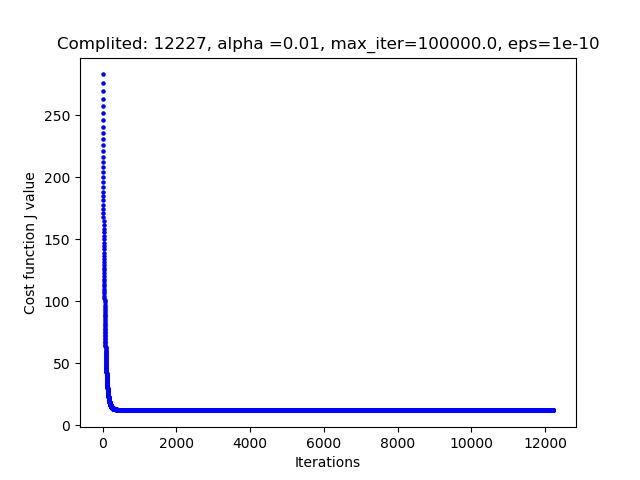

In [4]:
X, y = load_boston(return_X_y = True)

X_train, X_test, y_train, y_test =  train_test_split(X, y, random_state = 2018)

scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

lin_reg = Linear_Regression(alpha = 0.01, verbose=0, eps=1e-10)

lin_reg.fit (X_train_scaled, y_train)

print ('b: {}, w= {}'.format(lin_reg.intercept_, lin_reg.coef_))
print ('R2 Test Score = %.3f%%'%(lin_reg.score(X_test_scaled, y_test)*100))
lin_reg.draw_cost_changes()

## Normal equation

In [5]:
class Normal_Equation():
    
    def fit(self, X_train, y):
        if np.ndim(X_train) == 1:
            X_train = X_train.reshape(X_train.size,-1) 
            
        X = np.zeros((X_train.shape[0],X_train.shape[1]+1))
        X[:,1:] = X_train
        dJw = np.linalg.pinv(X.T @ X) @ X.T @ y
        self.w = dJw
   
    def predict(self, X_test):
        if np.ndim(X_test) == 1:
            X_test = X_test.reshape(X_test.size,-1) 
            
        X = np.zeros((X_test.shape[0], X_test.shape[1]+1))
        X[:,1:] = X_test
        return X@self.w
   
    def score(self, X_test, y_test):
        z = self.predict(X_test)
        return (r2_score(y_test, z))

In [6]:
X, y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2018)

norm_eq = Normal_Equation()
norm_eq.fit(X_train, y_train)

print ('R2 Test Score = %.3f%%' %(norm_eq.score(X_test, y_test)*100))

R2 Test Score = 76.076%


***
## Diabetes dataset

In [7]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_diabetes

In [8]:
data = load_diabetes()
X = data.data
y = data.target
print("{}\t{}\n\n{}" .format(X[0], y[0], data.DESCR[40:-311]))

[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]	151.0


-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).




## Ridge

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2018)

ridge_model = Ridge(alpha=0.0005, fit_intercept=True, normalize=False,
                    max_iter=1000, tol=0.001)

ridge_model.fit(X_train, y_train)

print ('R2 Train Score = %.3f%%' %(r2_score(y_train, ridge_model.predict(X_train))*100))
print ('R2 Test Score =  %.3f%%' %(r2_score(y_test, ridge_model.predict(X_test))*100))

R2 Train Score = 53.913%
R2 Test Score =  42.526%


## Lasso

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2018)

lasso_model = Lasso(alpha=0.002, fit_intercept=True, normalize=False, 
                    max_iter=1000, tol=0.0001)

lasso_model.fit(X_train, y_train)


print ('R2 Train Score = %.3f%%' %(r2_score(y_train, lasso_model.predict(X_train))*100))
print ('R2 Test Score =  %.3f%%' %(r2_score(y_test, lasso_model.predict(X_test))*100))

R2 Train Score = 53.900%
R2 Test Score =  42.537%


## Ridge with Polynomial

In [11]:
polynomial = PolynomialFeatures(degree = 2, interaction_only = True)
X_ = polynomial.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_, y, random_state = 2018)

ridge_pol = Ridge(alpha=0.005, normalize=False, max_iter=1000, tol=0.001)
ridge_pol.fit (X_train, y_train)

print ('R2 Train Score = %.3f%%' %(r2_score(y_train, ridge_pol.predict(X_train))*100))
print ('R2 Test Score =  %.3f%%' %(r2_score(y_test, ridge_pol.predict(X_test))*100))

R2 Train Score = 56.465%
R2 Test Score =  43.566%


## Lasso with Polynomial

In [12]:
polynomial = PolynomialFeatures(degree = 2, interaction_only = False)
X_ = polynomial.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_, y, random_state = 2018)

lasso_pol = Lasso(alpha=0.009, normalize=False, max_iter=1000, tol=0.00001)
lasso_pol.fit (X_train, y_train)

print ('R2 Train Score = %.3f%%' %(r2_score(y_train, lasso_pol.predict(X_train))*100))
print ('R2 Test Score =  %.3f%%' %(r2_score(y_test, lasso_pol.predict(X_test))*100))

R2 Train Score = 56.736%
R2 Test Score =  43.769%
